In [45]:
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import sys

In [46]:
sys.path.append(str(Path.cwd().parent))

In [47]:
from scr.utils import min_max_scaler

In [ ]:
ROOT = Path().cwd().parent
PARAMETER_SPACE = "03"
DATA_TYPE = "Test"
ROOT

PosixPath('/Users/thomassimader/Documents/NIRB')

In [ ]:
temperature_file = ROOT / "data" / PARAMETER_SPACE / "TestMapped"/ "s100_100_100_b0_4000_0_5000_-4000_-0" / "Exports"  / f"{DATA_TYPE}_temperatures.npy"
temperatures  = np.load(temperature_file)
temperatures = temperatures[:, -1, :]
export_folder = temperature_file.parents[1]


In [56]:
min_max       = np.load(temperature_file.parents[1] / "BasisFunctions" / "min_max.npy")

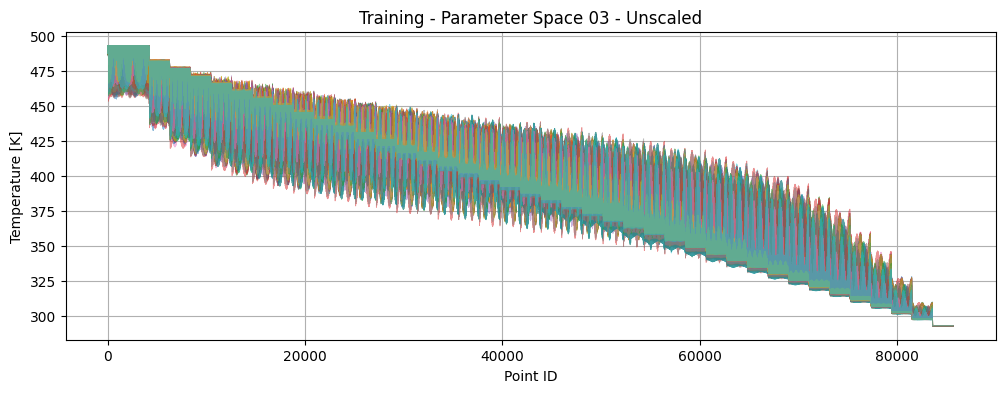

In [60]:
fig, ax = plt.subplots(figsize = (12, 4))
n_points = np.arange(temperatures.shape[1])
for temperature in temperatures:
    ax.step(n_points,
            temperature,
            alpha = 0.5,
            linewidth = 0.5)

ax.set_xlabel("Point ID")
ax.set_ylabel("Temperature [K]")
ax.set_title(f"{DATA_TYPE} - Parameter Space {PARAMETER_SPACE} - Unscaled")
ax.grid()
plt.savefig(export_folder / f"{DATA_TYPE}_PS_{PARAMETER_SPACE}_Unscaled")
plt.show()

In [61]:
temperatures_scaled = min_max_scaler(temperatures)

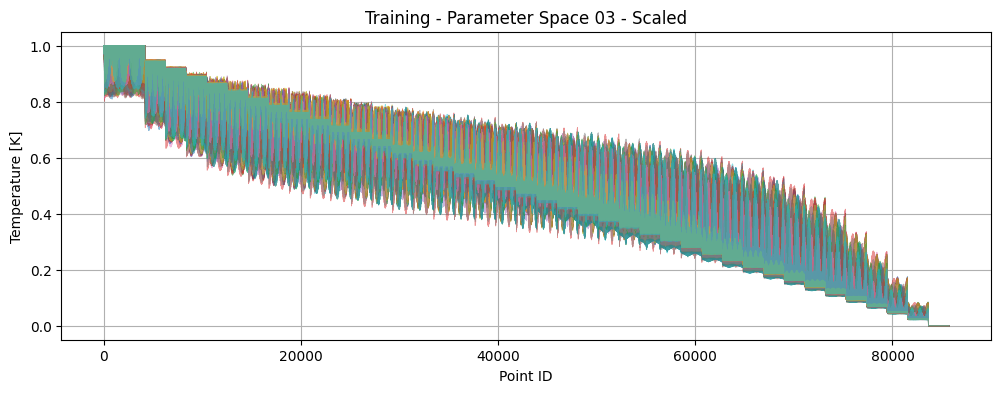

In [63]:
fig, ax = plt.subplots(figsize = (12, 4))
n_points = np.arange(temperatures_scaled.shape[1])
for temperature in temperatures_scaled:
    ax.step(n_points,
            temperature,
            alpha = 0.5,
            linewidth = 0.5)

ax.set_xlabel("Point ID")
ax.set_ylabel("Temperature [K]")
ax.set_title(f"{DATA_TYPE} - Parameter Space {PARAMETER_SPACE} - Scaled")
ax.grid()
plt.savefig(export_folder / f"{DATA_TYPE}_PS_{PARAMETER_SPACE}_Scaled")
plt.show()